<h1>Heart Disease Indicator</h1>

# Importing Dependencies

In [52]:
import numpy as np
import pandas as pd #Import dataframe
from sklearn.model_selection import train_test_split #Splitng training and testing data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # For evaluation of our model
import seaborn as sns
import matplotlib.pyplot as plt


# Data Collection 

In [53]:
heart_data = pd.read_csv(r"C:\Users\amank\OneDrive\Desktop\heart_disease_data.csv")


In [54]:
#Printing first 5 and last 5 rows
heart_data.head(-5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [55]:
# Number of rows and columns
heart_data.shape

(303, 14)

In [56]:
# More information
heart_data.info() #We see that there are no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
heart_data.isnull().sum() #We have no nulls in this dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
# Statistical measure of the data
heart_data.describe() # if target is zero then no heart disease, if 1 then yes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
# Checking the distribution of target variable
#  1--> Defective Heart ,    0 --> Healthy Heart

heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Few Data visualisations

Distribution of target variable 

C:\Users\amank\AppData\Local\Temp\ipykernel_26424\1416263463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


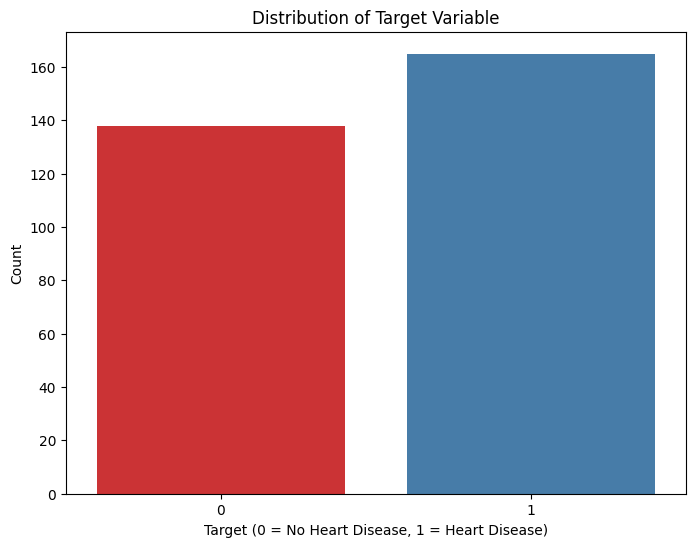

In [72]:
# Distrbution of Target within the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

Distribution of Age within the Dataset

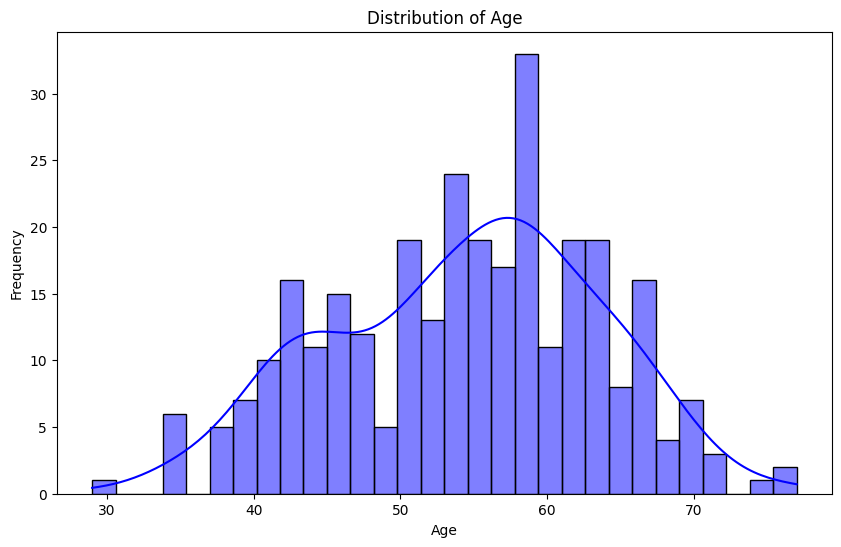

In [73]:
# Distribution of Age within the datset
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Age Distribution by Target

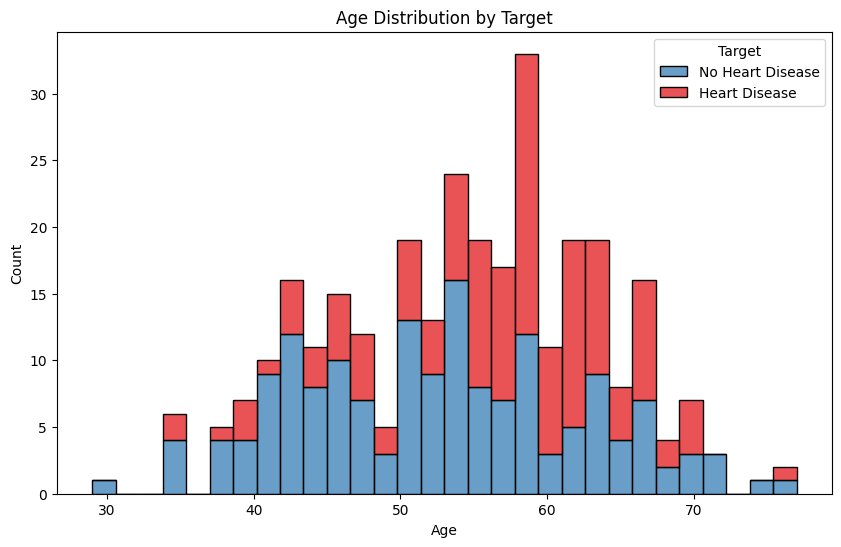

In [71]:
# Plotting the age distribution by target within the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='Set1', bins=30)
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [74]:
# Splitting the features and target
X = heart_data.drop(columns='target' , axis=1)  # When dropping a column u mention axis =1 , when row, axis=0
Y = heart_data['target']

print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Now we feed the X and Y values into our ML model

splitting training and test data

In [26]:
# Create 4 Variable

X_Train , X_Test , Y_Train , Y_Test = train_test_split(X,Y ,test_size=0.2 , stratify= Y , random_state= 2) # Stratifiy will allow even split of females and males


In [28]:
print(X.shape , X_Test.shape , X_Train.shape)

(303, 13) (61, 13) (242, 13)


 # Model Training

<p>Logistic Regression Model</p>

In [29]:
model = LogisticRegression()
#Training Logistic Regression model with training data
model.fit(X_Train,Y_Train)

c:\Users\amank\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 # Model Evaluation

In [39]:
# Accuracy on training data
X_Train_Prediction = model.predict(X_Train)
training_data_accuracy = accuracy_score(X_Train_Prediction, Y_Train)
print('training_data_accuracy : ', training_data_accuracy*100 ,'%')

training_data_accuracy :  85.12396694214877 %


In [40]:
# Accuracy on test data
X_Test_Prediction = model.predict(X_Test)
training_data_accuracy = accuracy_score(X_Test_Prediction, Y_Test)
print('training_data_accuracy : ', training_data_accuracy*100 ,'%')

training_data_accuracy :  81.9672131147541 %


# Building a predective model

In [44]:
input_data = (62,0,0,138,294,1,1,106,0,1.9,1,3,2)

#Changing data to a numpy array

input_data_Array = np.asarray(input_data)

#Reshape the numpy array as we are dealing with only one instance
input_data_reshape = input_data_Array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

if (prediction[0] == 0):
    print('The Person does not have a heart disease')
else :
    print('The person has a heart disease')


The Person does not have a heart disease


c:\Users\amank\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
input_data = (53,1,2,130,197,1,0,152,0,1.2,0,0,2)

#Changing data to a numpy array

input_data_Array = np.asarray(input_data)

#Reshape the numpy array as we are dealing with only one instance
input_data_reshape = input_data_Array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

if (prediction[0] == 0):
    print('The Person does not have a heart disease')
else :
    print('The person has a heart disease')

The person has a heart disease


c:\Users\amank\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
